In [22]:
import tkinter as tk
from tkinter import messagebox
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


class TodoList:
    def __init__(self):
        self.tasks = pd.DataFrame(columns=['Task', 'Subject 1', 'Subject 2', 'Subject 3', 'Completed at'])
        self.create_gui()

    def create_gui(self):
        self.window = tk.Tk()
        self.window.title('To-Do List')
        self.window.geometry('500x500')

        # Task Entry Box
        self.task_label = tk.Label(self.window, text='Task:')
        self.task_label.pack()
        self.task_entry = tk.Entry(self.window)
        self.task_entry.pack()

        # Subject Entry Boxes
        self.subject_labels = []
        self.subject_entries = []
        for i in range(3):
            label = tk.Label(self.window, text=f'Subject {i+1}:')
            entry = tk.Entry(self.window)
            self.subject_labels.append(label)
            self.subject_entries.append(entry)
            label.pack()
            entry.pack()

        # Completion Time Entry Box
        self.time_label = tk.Label(self.window, text='Completed at (HH:MM):')
        self.time_label.pack()
        self.time_entry = tk.Entry(self.window)
        self.time_entry.pack()

        # Add Task Button
        self.add_button = tk.Button(self.window, text='Add Task', command=self.add_task)
        self.add_button.pack()

        # Filter Tasks Button
        self.filter_button = tk.Button(self.window, text='Filter Tasks', command=self.filter_tasks)
        self.filter_button.pack()

        # Verimli Saat Butonu
        self.verimli_saat_button = tk.Button(self.window, text='Verimli Saat', command=self.find_most_productive_hour)
        self.verimli_saat_button.pack()

        # Task Listbox
        self.task_listbox = tk.Listbox(self.window)
        self.task_listbox.pack()

        self.window.mainloop()

    def add_task(self):
        # Get task information from entry boxes
        task = self.task_entry.get()
        subject_1 = self.subject_entries[0].get()
        subject_2 = self.subject_entries[1].get()
        subject_3 = self.subject_entries[2].get()
        completed_at = self.time_entry.get()

        # Add new row to tasks DataFrame
        self.tasks = self.tasks.append({'Task': task,
                                        'Subject 1': subject_1,
                                        'Subject 2': subject_2,
                                        'Subject 3': subject_3,
                                        'Completed at': completed_at}, ignore_index=True)

        # Clear entry boxes
        self.task_entry.delete(0, tk.END)
        for entry in self.subject_entries:
            entry.delete(0, tk.END)
        self.time_entry.delete(0, tk.END)

        # Update task listbox
        self.update_task_listbox()

    def update_task_listbox(self):
        # Clear task listbox
        self.task_listbox.delete(0, tk.END)

        # Add tasks to listbox
        for i, task in self.tasks.iterrows():
            self.task_listbox.insert (i, f"{task['Task']}: {task['Subject 1']}, {task['Subject 2']}, {task}")
                                         
class Task:
    def __init__(self, task_name, topic1="", topic2="", topic3=""):
        self.task_name = task_name
        self.topics = {1: [topic1, None], 2: [topic2, None], 3: [topic3, None]}

    def set_topic_time(self, topic_num, time):
        self.topics[topic_num][1] = time

    def __str__(self):
        return self.task_name

class ToDoList:
    def __init__(self):
        self.tasks = []

    def add_task(self, task):
        self.tasks.append(task)

    def filter_by_topic(self, topic):
        filtered_tasks = []
        for task in self.tasks:
            for t in task.topics.values():
                if t[0] == topic and t[1] is not None:
                    filtered_tasks.append(task)
                    break
        return filtered_tasks

    def most_efficient_time(self):
        times = {}
        for task in self.tasks:
            for topic in task.topics.values():
                if topic[1] is not None:
                    hour = int(topic[1].strftime("%H"))
                    if hour in times:
                        times[hour] += 1
                    else:
                        times[hour] = 1
        sorted_times = sorted(times.items(), key=lambda x: x[1], reverse=True)
        return sorted_times[0][0]

todo_list = ToDoList()

def add_task():
    task_name = task_entry.get()
    topic1 = topic1_entry.get()
    topic2 = topic2_entry.get()
    topic3 = topic3_entry.get()
    task = Task(task_name, topic1, topic2, topic3)
    todo_list.add_task(task)
    task_entry.delete(0, tk.END)
    topic1_entry.delete(0, tk.END)
    topic2_entry.delete(0, tk.END)
    topic3_entry.delete(0, tk.END)

def filter_tasks():
    topic = filter_entry.get()
    filtered_tasks = todo_list.filter_by_topic(topic)
    tasks_text.delete(1.0, tk.END)
    for task in filtered_tasks:
        tasks_text.insert(tk.END, str(task) + "\n")

def suggest_time():
    time = todo_list.most_efficient_time()
    tk.messagebox.showinfo("Suggested Time", f"The most efficient time for your tasks is {time}:00.")

root = tk.Tk()
root.title("To Do List")

# Labels
tk.Label(root, text="Task:").grid(row=0, column=0, sticky="w")
tk.Label(root, text="Topic 1:").grid(row=1, column=0, sticky="w")
tk.Label(root, text="Topic 2:").grid(row=2, column=0, sticky="w")
tk.Label(root, text="Topic 3:").grid(row=3, column=0, sticky="w")
tk.Label(root, text="Filter by topic:").grid(row=4, column=0, sticky="w")

# Entries
task_entry = tk.Entry(root)
topic1_entry = tk.Entry(root)
topic2_entry = tk.Entry(root)
topic3_entry = tk.Entry(root)
filter_entry = tk.Entry(root)
task_entry.grid(row=0, column=1)
topic1_entry.grid(row=1, column=1)
topic2_entry.grid(row=2, column=1)
topic3_entry.grid(row=3, column=1)
filter_entry.grid(row=4, column=1)

# Buttons
tk.Button (root, text="Add Task", command=add_task)
    # verimli saat için grafik oluşturma
def create_chart(self):
        # tüm konular için tamamlanma saatlerini depolamak için boş bir sözlük oluşturuyoruz
    hours = {}
    for task in self.tasks:
        for subject in task.subjects:
            if subject.completed_time is not None:
                hour = subject.completed_time.hour
                if hour in hours:
                    hours[hour] += 1
                else:
                    hours[hour] = 1

        # saat ve tamamlanma sayısı listeleri oluşturma
        hours_list = []
        completion_list = []
        for hour, completion_count in sorted(hours.items()):
            hours_list.append(hour)
            completion_list.append(completion_count)

        # grafik çizimi
        plt.plot(hours_list, completion_list)
        plt.title("En Verimli Saat")
        plt.xlabel("Saat")
        plt.ylabel("Tamamlanan Konu Sayısı")
        plt.show()



Select an option:
1. Add task
2. Remove task
3. Mark task as done
4. Get all tasks
5. Generate report
6. Plot data
7. Quit


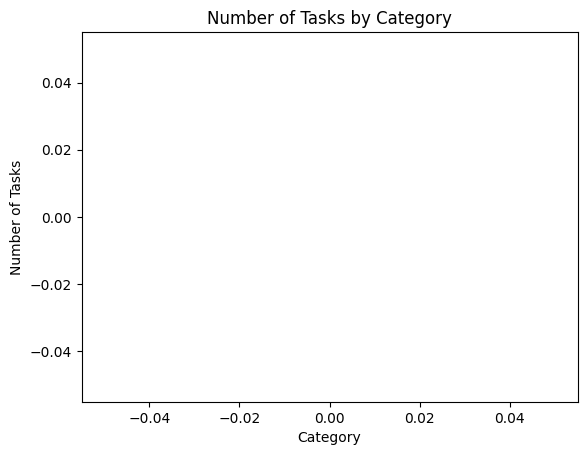


Select an option:
1. Add task
2. Remove task
3. Mark task as done
4. Get all tasks
5. Generate report
6. Plot data
7. Quit


AttributeError: 'DataFrame' object has no attribute 'append'

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

class ToDoList:
    def __init__(self):
        self.data = pd.DataFrame(columns=['task', 'priority', 'category', 'done'])

    def add_task(self, task, priority, category):
        new_data = {'task': task, 'priority': priority, 'category': category, 'done': False}
        self.data = self.data.append(new_data, ignore_index=True)

    def remove_task(self, task):
        self.data.drop(self.data[self.data['task'] == task].index, inplace=True)

    def mark_as_done(self, task):
        self.data.loc[self.data['task'] == task, 'done'] = True

    def get_all_tasks(self):
        return self.data

    def generate_report(self):
        print("Number of tasks by category:")
        print(self.data['category'].value_counts())
        print("\nNumber of tasks by priority:")
        print(self.data['priority'].value_counts())

    def plot_data(self):
        categories = self.data['category'].unique()
        counts = []
        for category in categories:
            counts.append(self.data[self.data['category'] == category].shape[0])
        plt.bar(categories, counts)
        plt.title('Number of Tasks by Category')
        plt.xlabel('Category')
        plt.ylabel('Number of Tasks')
        plt.show()

my_list = ToDoList()

while True:
    print("\nSelect an option:")
    print("1. Add task")
    print("2. Remove task")
    print("3. Mark task as done")
    print("4. Get all tasks")
    print("5. Generate report")
    print("6. Plot data")
    print("7. Quit")

    choice = input()

    if choice == '0':
        break
    elif choice == '1':
        task = input('Enter the task: ')
        priority = input('Enter the priority (low, medium, high): ')
        category = input('Enter the category: ')
        my_list.add_task(task, priority, category)
    elif choice == '2':
        task = input('Enter the task: ')
        my_list.remove_task(task)
    elif choice == '3':
        task = input('Enter the task: ')
        my_list.mark_as_done(task)
    elif choice == '4':
        print(my_list.get_all_tasks())
    elif choice == '5':
        my_list.generate_report()
    elif choice == '6':
        my_list.plot_data()
    elif choice == '7':
        print("Goodbye!")
        break
    else:
        print("Invalid choice. Please try again.")
